<a href="https://colab.research.google.com/github/riddhigarg2605/RBC/blob/main/hypochromic_via_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow

In [4]:
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [5]:
IMAGE_SIZE = [224, 224]

In [ ]:
!unzip '/content/hypo.zip'

In [7]:
train_path = '/content/hypo/train'
valid_path = '/content/hypo/val'

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/hypo/train/*')

In [11]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/hypo/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 310 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/hypo/val',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 75 images belonging to 2 classes.


In [20]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
31/31 [==============================] - 192s 6s/step - loss: 0.6634 - accuracy: 0.6258 - val_loss: 0.5973 - val_accuracy: 0.5600
Epoch 2/5
31/31 [==============================] - 190s 6s/step - loss: 0.5705 - accuracy: 0.7000 - val_loss: 0.5212 - val_accuracy: 0.8400
Epoch 3/5
31/31 [==============================] - 191s 6s/step - loss: 0.4851 - accuracy: 0.8161 - val_loss: 0.4855 - val_accuracy: 0.7733
Epoch 4/5
31/31 [==============================] - 190s 6s/step - loss: 0.4509 - accuracy: 0.8290 - val_loss: 0.4409 - val_accuracy: 0.8400
Epoch 5/5
31/31 [==============================] - 190s 6s/step - loss: 0.4990 - accuracy: 0.7871 - val_loss: 0.5434 - val_accuracy: 0.8267


In [21]:
model.save('hypochromic_transfer_model.h5')

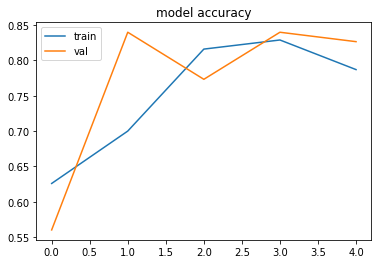

<Figure size 432x288 with 0 Axes>

In [24]:
# accuracies
plt.plot(r.history['accuracy'], label='train')
plt.plot(r.history['val_accuracy'], label='val')
plt.legend()
plt.title('model accuracy')
plt.show()
plt.savefig('AccVal_acc')

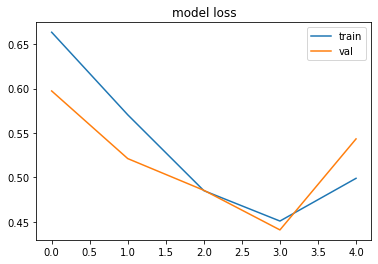

<Figure size 432x288 with 0 Axes>

In [25]:
# loss
plt.plot(r.history['loss'], label='train')
plt.plot(r.history['val_loss'], label='val')
plt.legend()
plt.title('model loss')
plt.show()
plt.savefig('LossVal_loss')